In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor

import matplotlib.pylab as plt
plt.style.use('ggplot')

# Boston Housing Dataset

This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms.

Warning. The Boston housing prices dataset has an ethical problem: the authors of this dataset engineered a non-invertible variable “B” assuming that racial self-segregation had a positive impact on house prices.

Column names:
 - CRIM - per capita crime rate by town
 - ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS - proportion of non-retail business acres per town.
 - CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
 - NOX - nitric oxides concentration (parts per 10 million)
 - RM - average number of rooms per dwelling
 - AGE - proportion of owner-occupied units built prior to 1940
 - DIS - weighted distances to five Boston employment centres
 - RAD - index of accessibility to radial highways
 - TAX - full-value property-tax rate per \$10,000
 - PTRATIO - pupil-teacher ratio by town
 - B - 1000(Bk - 0.63)^2
 - LSTAT - perc. lower status of the population
 - MEDV - Median value of owner-occupied homes in $1000's
 
### Target: MEDV


In [2]:
column_names = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [4]:
features = column_names[:-1]
X, y = data[features], data['MEDV']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
X_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
173,0.09178,0.0,4.05,0,0.510,6.416,84.1,2.6463,5,296.0,16.6,395.50,9.04
274,0.05644,40.0,6.41,1,0.447,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53
491,0.10574,0.0,27.74,0,0.609,5.983,98.8,1.8681,4,711.0,20.1,390.11,18.07
72,0.09164,0.0,10.81,0,0.413,6.065,7.8,5.2873,4,305.0,19.2,390.91,5.52
452,5.09017,0.0,18.10,0,0.713,6.297,91.8,2.3682,24,666.0,20.2,385.09,17.27
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,18.81100,0.0,18.10,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37
436,14.42080,0.0,18.10,0,0.740,6.461,93.3,2.0026,24,666.0,20.2,27.49,18.05
411,14.05070,0.0,18.10,0,0.597,6.657,100.0,1.5275,24,666.0,20.2,35.05,21.22
86,0.05188,0.0,4.49,0,0.449,6.015,45.1,4.4272,3,247.0,18.5,395.99,12.86


# Decision Tree

In [7]:
model1 = DecisionTreeRegressor(
    criterion = 'mse',
    max_depth = 5,
    min_samples_split = 4,
    min_samples_leaf = 2,
    random_state=42
)

In [8]:
model1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=2, min_samples_split=4,
                      random_state=42)

In [9]:
dt_prediction = model1.predict(X_test)

In [10]:
dt_mse = round(mean_squared_error(dt_prediction, y_test), 2)
print('Test MSE:', dt_mse)

Test MSE: 9.34


Text(0, 0.5, 'Ground Truth')

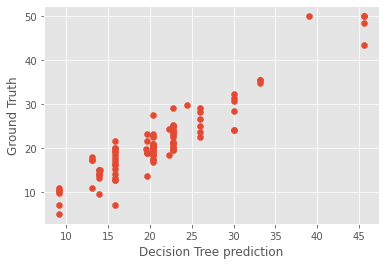

In [11]:
plt.scatter(dt_prediction, y_test)
plt.xlabel('Decision Tree prediction')
plt.ylabel('Ground Truth')

# Random Forest

In [12]:
model2 = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
#     min_samples_split=2,
#     min_samples_leaf=2,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

In [13]:
model2.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [14]:
rf_prediction = model2.predict(X_test)

In [15]:
rf_mse = round(mean_squared_error(rf_prediction, y_test), 2)
print('Test MSE:', rf_mse)

Test MSE: 7.9


Text(0, 0.5, 'Ground Truth')

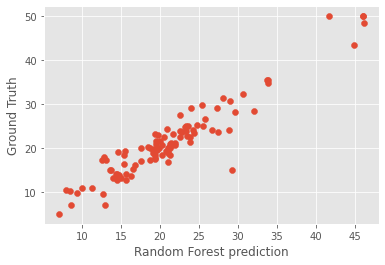

In [16]:
plt.scatter(rf_prediction, y_test)
plt.xlabel('Random Forest prediction')
plt.ylabel('Ground Truth')

# Analysing feature importance using mean decrease in impurity (MDI)

Gini Importance or Mean Decrease in Impurity (MDI) calculates each feature importance as the sum over the number of splits (across all tress) that include the feature, proportionally to the number of samples it splits.

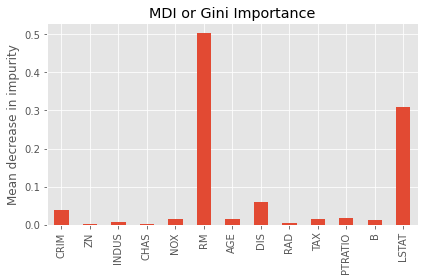

In [17]:
importances = model2.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# AdaBoost

In [18]:
model3 = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='square',
    random_state=42
)

In [19]:
model3.fit(X_train, y_train)

AdaBoostRegressor(learning_rate=0.05, loss='square', n_estimators=1500,
                  random_state=42)

In [20]:
ada_prediction = model3.predict(X_test)

In [21]:
ada_mse = round(mean_squared_error(ada_prediction, y_test), 2)
print('Test MSE:', ada_mse)

Test MSE: 10.54


Text(0, 0.5, 'Ground Truth')

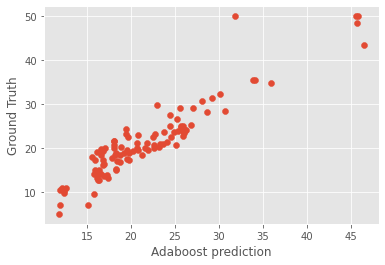

In [22]:
plt.scatter(ada_prediction, y_test)
plt.xlabel('Adaboost prediction')
plt.ylabel('Ground Truth')

# Gradient Boosting Machine

In [23]:
model4 = GradientBoostingRegressor(
    learning_rate=0.01,
    n_estimators=2000,
    subsample=1.0, 
    criterion='mse', 
    min_samples_split=4, 
    min_samples_leaf=2, 
    min_weight_fraction_leaf=0.0, 
    max_depth=9, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=0, 
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0
)

In [24]:
model4.fit(X_train, y_train)

GradientBoostingRegressor(criterion='mse', learning_rate=0.01, max_depth=9,
                          min_samples_leaf=2, min_samples_split=4,
                          n_estimators=2000, random_state=0)

In [25]:
gb_prediction = model4.predict(X_test)

In [26]:
gb_mse = round(mean_squared_error(gb_prediction, y_test), 2)
print('Test MSE:', gb_mse)

Test MSE: 7.67


Text(0, 0.5, 'Ground Truth')

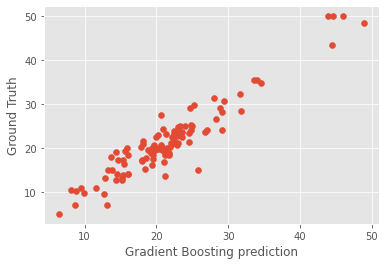

In [27]:
plt.scatter(gb_prediction, y_test)
plt.xlabel('Gradient Boosting prediction')
plt.ylabel('Ground Truth')

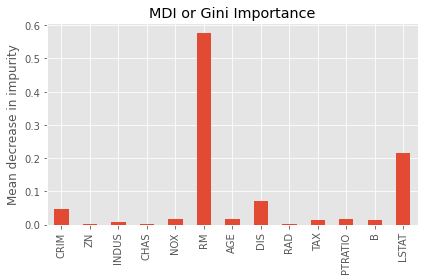

In [28]:
importances = model4.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("MDI or Gini Importance")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()


# LightGBM

In [29]:
model5 = lgb.LGBMRegressor(
    num_leaves=10,
    max_depth=5, 
    random_state=42, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=2000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

In [30]:
model5.fit(X_train, y_train)

LGBMRegressor(colsample_bytree=0.95, learning_rate=0.05, max_depth=5,
              metric='mse', n_estimators=2000, n_jobs=4, num_leaves=10,
              random_state=42, subsample=0.9)

In [31]:
lgbm_prediction = model5.predict(X_test)

In [32]:
lgb_mse = round(mean_squared_error(lgbm_prediction, y_test), 2)
print('Test MSE:', lgb_mse)

Test MSE: 6.57


Text(0, 0.5, 'Ground Truth')

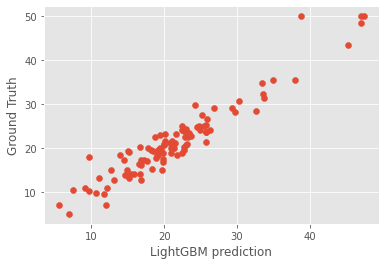

In [33]:
plt.scatter(lgbm_prediction, y_test)
plt.xlabel('LightGBM prediction')
plt.ylabel('Ground Truth')

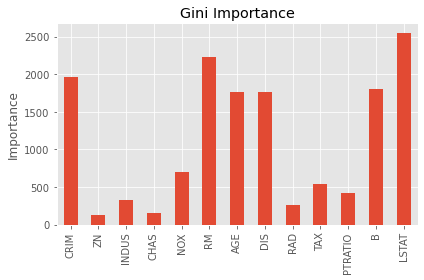

In [34]:
importances = model5.feature_importances_
forest_importances = pd.Series(importances, index=X.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Gini Importance")
ax.set_ylabel("Importance")
fig.tight_layout()

# CatBoost

In [35]:
model6 = CatBoostRegressor(
    n_estimators=500,
    learning_rate=0.1,
    thread_count=-1,
    depth=7,
    silent=True,
    random_seed=42,
    bagging_temperature=0.2
#     od_type="Iter"
)

In [36]:
model6.fit(X_train, y_train)

In [37]:
cat_prediction = model6.predict(X_test)

In [38]:
cat_mse = round(mean_squared_error(cat_prediction, y_test), 2)
print('Test MSE:', cat_mse)

Test MSE: 8.35


Text(0, 0.5, 'Ground Truth')

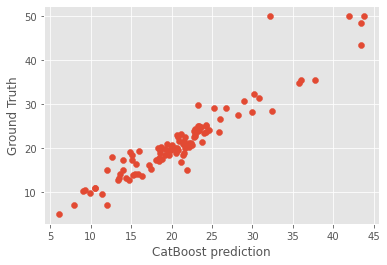

In [39]:
plt.scatter(cat_prediction, y_test)
plt.xlabel('CatBoost prediction')
plt.ylabel('Ground Truth')

# Stacking

In [40]:
acc = pd.DataFrame(
    {'Decision Tree': dt_mse,
     'Random Forest': rf_mse,
     'AdaBoost':      ada_mse,
     'GBM':           gb_mse,
     'LightGBM':      lgb_mse,
     'CatBoost':      cat_mse},
    index=[0]
)
acc = acc.T
acc.columns = ['MSE']
acc

,MSE
Decision Tree,9.34
Random Forest,7.90
AdaBoost,10.54
GBM,7.67
LightGBM,6.57
CatBoost,8.35


## Simple averaging

In [41]:
# Let's average some models
avg_prediction = np.mean([dt_prediction, ada_prediction], axis=0)
print('Test MSE:', round(mean_squared_error(avg_prediction, y_test), 2))

Test MSE: 8.38


In [42]:
avg_prediction = np.mean([gb_prediction, lgbm_prediction], axis=0)
print('Test MSE:', round(mean_squared_error(avg_prediction, y_test), 2))

Test MSE: 6.17


In [43]:
avg_prediction = np.average(
    [dt_prediction,
     lgbm_prediction,
     ada_prediction,
     gb_prediction,
     lgbm_prediction,
     cat_prediction
    ],
    weights = 1 / acc['MSE'] ** 4,
    axis=0
)
print('Test MSE:', round(mean_squared_error(avg_prediction, y_test), 2))

Test MSE: 6.04


Text(0, 0.5, 'Ground Truth')

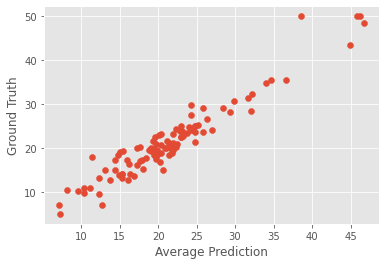

In [44]:
plt.scatter(avg_prediction, y_test)
plt.xlabel('Average Prediction')
plt.ylabel('Ground Truth')

## True Stacking

![alt text](stacking.png "Stacking")

## First step

In [45]:
ntrain = X_train.shape[0]
ntest = X_test.shape[0]
SEED = 42 # for reproducibility
NFOLDS = 5 # set number of folds for out-of-fold prediction
kf = KFold(
    n_splits=NFOLDS,
    shuffle=True,
    random_state=SEED
) # K-Folds cross-validator

def get_oof(clf, x_train, y_train, x_test):
    """
    Popular function on Kaggle.
    
    Trains a classifier on 4/5 of the training data and
    predicts the rest (1/5). This procedure is repeated for all 5 folds,
    thus we have predictions for all training set. This prediction is one
    column of meta-data, later on used as a feature column by a meta-algorithm.
    We predict the test part and average predictions across all 5 models.
    
    Keyword arguments:
    clf -- classifier
    x_train -- 4/5 of training data
    y_train -- corresponding labels
    x_test -- all test data
    
    """
    oof_train = np.zeros((ntrain,))
    oof_test = np.zeros((ntest,))
    oof_test_skf = np.empty((NFOLDS, ntest))

    for i, (train_index, test_index) in enumerate(kf.split(x_train)):
        x_tr = x_train[train_index]
        y_tr = y_train[train_index]
        x_te = x_train[test_index]

        clf.fit(x_tr, y_tr)

        oof_train[test_index] = clf.predict(x_te)
        oof_test_skf[i, :] = clf.predict(x_test)

    oof_test[:] = oof_test_skf.mean(axis=0)
    return oof_train.reshape(-1, 1), oof_test.reshape(-1, 1)

In [46]:
model1 = DecisionTreeRegressor(
    criterion = 'mse',
    max_depth = 5,
    min_samples_split = 4,
    min_samples_leaf = 2,
    random_state=SEED
)

model2 = RandomForestRegressor(
    n_estimators=100,
    criterion='mse',
    max_depth=None,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=SEED,
    verbose=0,
    warm_start=False,
    ccp_alpha=0.0,
    max_samples=None
)

model3 = AdaBoostRegressor(
    n_estimators=1500,
    learning_rate=0.05,
    loss='square',
    random_state=SEED
)

model4 = GradientBoostingRegressor(
    learning_rate=0.01,
    n_estimators=2000,
    subsample=1.0, 
    criterion='mse', 
    min_samples_split=4, 
    min_samples_leaf=2, 
    min_weight_fraction_leaf=0.0, 
    max_depth=9, 
    min_impurity_decrease=0.0, 
    init=None, 
    random_state=42, 
    max_features=None,
    alpha=0.9,
    verbose=0,
    max_leaf_nodes=None,
    warm_start=False,
    validation_fraction=0.1,
    n_iter_no_change=None,
    tol=0.0001,
    ccp_alpha=0.0
)

model5 = lgb.LGBMRegressor(
    num_leaves=10,
    max_depth=5, 
    random_state=SEED, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=2000,
    colsample_bytree=0.95,
    subsample=0.9,
    learning_rate=0.05
)

model6 = CatBoostRegressor(
    n_estimators=500,
    learning_rate=0.1,
    thread_count=-1,
    depth=7,
    silent=True,
    random_seed=SEED,
    bagging_temperature=0.2
)

In [47]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.ravel()
dt_oof_train, dt_oof_test = get_oof(model1, X_train, y_train, X_test)
print('All preictions for train set:', len(dt_oof_train))
print('All preictions for test set:', len(dt_oof_test))

All preictions for train set: 404
All preictions for test set: 102


In [48]:
rf_oof_train, rf_oof_test = get_oof(model2, X_train, y_train, X_test)
ada_oof_train, ada_oof_test = get_oof(model3, X_train, y_train, X_test)
gb_oof_train, gb_oof_test = get_oof(model4, X_train, y_train, X_test)
lgbm_oof_train, lgbm_oof_test = get_oof(model5, X_train, y_train, X_test)
cat_oof_train, cat_oof_test = get_oof(model6, X_train, y_train, X_test)

### First-level output as new features


## Second step

In [49]:
x_train = np.concatenate((
    dt_oof_train,
    rf_oof_train,
    ada_oof_train,
    gb_oof_train,
    lgbm_oof_train,
    cat_oof_train
), axis=1)

x_test = np.concatenate((
    dt_oof_test,
    rf_oof_test,
    ada_oof_test,
    gb_oof_test,
    lgbm_oof_test,
    cat_oof_test
), axis=1)

In [50]:
META_MODEL = lgb.LGBMRegressor(
    num_leaves=5,
    max_depth=7, 
    random_state=SEED, 
    silent=True, 
    metric='mse',
    n_jobs=4, 
    n_estimators=200,
    colsample_bytree=1,
    subsample=0.9,
    learning_rate=0.05
)

META_MODEL.fit(x_train, y_train)
final_predictions = META_MODEL.predict(x_test)


In [51]:
cat_mse = round(mean_squared_error(final_predictions, y_test), 2)
print('Test MSE:', cat_mse)

Test MSE: 5.99


Text(0, 0.5, 'Ground Truth')

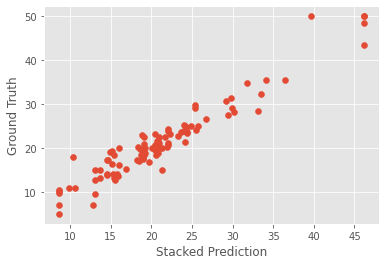

In [52]:
plt.scatter(final_predictions, y_test)
plt.xlabel('Stacked Prediction')
plt.ylabel('Ground Truth')